## 1. Fragestellungen und Datenbeschaffung

### 1.1 Titel:

- Zusammenhang zwischen Müttersterblichkeitsrate und Armut von 1990 bis 2020

### 1.2 Fragestellungen:

- Besteht eine Korrelation zwischen der Müttersterblichkeitsrate und der Armutsrate in verschiedenen Ländern zwischen 1990 und 2020?
- (Welche Länder zeigen den stärksten positiven oder negativen Zusammenhang zwischen diesen beiden Variablen?)
- Welche möglichen Ursachen gibt es für die erkannten Zusammenhänge?

### 1.3 Datenquellen:

- 
- 

### 1.4 Datenbeschaffung und laden:

In [99]:
import pandas as pd
from matplotlib import pyplot as plt

In [100]:
# Laden der Daten für Anzahl der in extremer Armut lebenden Menschen, 1990 bis 2020
df = pd.read_csv('number-of-people-living-in-extreme-poverty.csv', skiprows=1,
                 names=['Gebiet','Jahr','Die Zahl unter 2,15 Dollar pro Tag']) 
df.head() 

,Gebiet,Jahr,"Die Zahl unter 2,15 Dollar pro Tag"
0,Albania,1996,16944
1,Albania,2002,33337
2,Albania,2005,17800
3,Albania,2008,5892
4,Albania,2012,18003


In [101]:
# Laden der Daten für Müttersterblichkeitsrate, 1990 bis 2020
df1 = pd.read_csv('maternal-mortality.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Müttersterblichkeitsrate']) 
df1.head()  

,Gebiet,Code,Jahr,Müttersterblichkeitsrate
0,Albania,ALB,1990,32.874947
1,Albania,ALB,1991,29.074210
2,Albania,ALB,1992,27.674513
3,Albania,ALB,1993,26.515451
4,Albania,ALB,1994,24.240550


In [102]:
df['Jahr'] = df['Jahr'].astype(int) 
df1['Jahr'] = df1['Jahr'].astype(int)  

# Merging the two dataframes
merged_df = pd.merge(df, df1, on=['Gebiet', 'Jahr'], how='inner')

# Drop rows with any NaN values in relevant columns
merged_df = merged_df.dropna(subset=['Die Zahl unter 2,15 Dollar pro Tag', 'Müttersterblichkeitsrate', 'Gebiet'])

# Displaying the first few rows of the merged dataframe
merged_df.head()

,Gebiet,Jahr,"Die Zahl unter 2,15 Dollar pro Tag",Code,Müttersterblichkeitsrate
0,Albania,1996,16944,ALB,18.685230
1,Albania,2002,33337,ALB,12.407263
2,Albania,2005,17800,ALB,10.830499
3,Albania,2008,5892,ALB,9.739404
4,Albania,2012,18003,ALB,7.796703


## 2. Datenvorbereitungen

In [103]:
pivot_table = merged_df.pivot(index='Gebiet', columns='Jahr', values=['Müttersterblichkeitsrate', 'Die Zahl unter 2,15 Dollar pro Tag'])

# Displaying the first 10 rows
pivot_table.head(10)


Müttersterblichkeitsrate                       \
Jahr                                       1990      1991       1992   
Gebiet                                                                 
Albania                                     NaN       NaN        NaN   
Algeria                                     NaN       NaN        NaN   
Armenia                                     NaN       NaN        NaN   
Azerbaijan                                  NaN       NaN        NaN   
Bangladesh                                  NaN  911.2366        NaN   
Bhutan                                      NaN       NaN        NaN   
Bolivia                                     NaN       NaN        NaN   
Bosnia and Herzegovina                      NaN       NaN        NaN   
Brazil                                194.28181       NaN  169.70510   
Bulgaria                                    NaN       NaN   22.47983   

                                                                          \
Jahr                         1993 1994        1995       1996       1997   
Gebiet                                                                     
Albania                       NaN  NaN         NaN   18.68523        NaN   
Algeria                       NaN  NaN  203.828450        NaN        NaN   
Armenia                       NaN  NaN         NaN        NaN        NaN   
Azerbaijan                    NaN  NaN   58.415882        NaN        NaN   
Bangladesh                    NaN  NaN  758.230800        NaN        NaN   
Bhutan                        NaN  NaN         NaN        NaN        NaN   
Bolivia                       NaN  NaN         NaN        NaN  311.22092   
Bosnia and Herzegovina        NaN  NaN         NaN        NaN        NaN   
Brazil                  158.88841  NaN  121.074120  110.06962   99.53553   
Bulgaria                      NaN  NaN         NaN        NaN        NaN   

                                             ...  \
Jahr                        1998       1999  ...   
Gebiet                                       ...   
Albania                      NaN        NaN  ...   
Algeria                      NaN        NaN  ...   
Armenia                      NaN   58.47666  ...   
Azerbaijan                   NaN        NaN  ...   
Bangladesh                   NaN        NaN  ...   
Bhutan                       NaN        NaN  ...   
Bolivia                      NaN  286.04156  ...   
Bosnia and Herzegovina       NaN        NaN  ...   
Brazil                  89.93645   74.07847  ...   
Bulgaria                     NaN        NaN  ...   

                       Die Zahl unter 2,15 Dollar pro Tag             \
Jahr                                                 2011       2012   
Gebiet                                                                 
Albania                                               NaN    18003.0   
Algeria                                               0.0        NaN   
Armenia                                           34710.0    24254.0   
Azerbaijan                                            NaN        NaN   
Bangladesh                                            NaN        NaN   
Bhutan                                                NaN    12478.0   
Bolivia                                          550887.0   683642.0   
Bosnia and Herzegovina                             2807.0        NaN   
Brazil                                         10548393.0  8986021.0   
Bulgaria                                         180678.0   168725.0   

                                                                     \
Jahr                         2013       2014       2015        2016   
Gebiet                                                                
Albania                       NaN    29558.0     2767.0      4006.0   
Algeria                       NaN        NaN        NaN         NaN   
Armenia                   50434.0    41590.0    32999.0     31752.0   
Azerbaijan                    NaN        NaN        NaN  

## 3. Statistik der Roh-Daten (Analyse im Long-Format)

In [104]:
merged_df.dtypes

Gebiet                                 object
Jahr                                    int32
Die Zahl unter 2,15 Dollar pro Tag      int64
Code                                   object
Müttersterblichkeitsrate              float64
dtype: object

### 3.1 Analyse Gebiete

In [105]:
print('Anzahl verschiedener Gebiete: ', len(merged_df['Gebiet'].unique()))


Anzahl verschiedener Gebiete:  79


In [106]:
# Anzahl Datenpunkte pro Gebiet
merged_df['Gebiet'].value_counts()

Gebiet
United States     31
United Kingdom    31
Brazil            27
Spain             27
France            26
                  ..
Vanuatu            2
Guyana             2
Iraq               2
Turkmenistan       1
Lebanon            1
Name: count, Length: 79, dtype: int64

In [107]:
import geopandas as gpd
# Load the world dataset from a public GeoJSON URL
url = "https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson"
world = gpd.read_file(url)

# Merge GeoDataFrame with merged_df
# Ensure country names match between datasets
merged_geo = world.merge(merged_df, left_on="name", right_on="Gebiet")

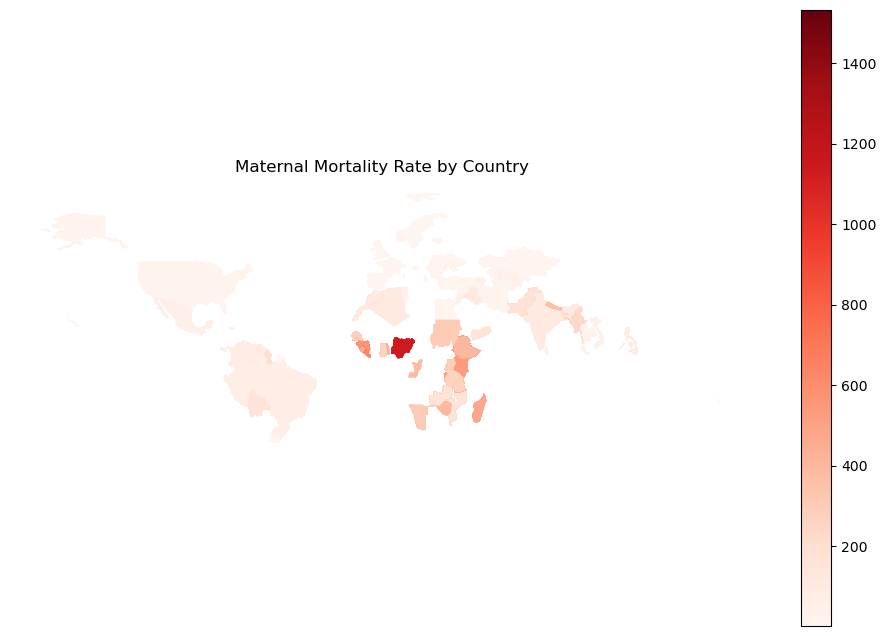

In [108]:
# Plot the data using the 'Müttersterblichkeitsrate' column
ax = merged_geo.plot(
    column="Müttersterblichkeitsrate",  # Column for color coding
    legend=True,
    cmap="Reds",  # Color map
    figsize=(12, 8)
)

# Add a title and adjust layout
ax.set_title("Maternal Mortality Rate by Country", fontsize=12)
ax.set_axis_off()  # Removes axis
plt.show()

C:\Users\veron\AppData\Local\Temp\ipykernel_9876\670242998.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colorbar.set_yticklabels([format_func(tick, 0) for tick in colorbar.get_yticks()])


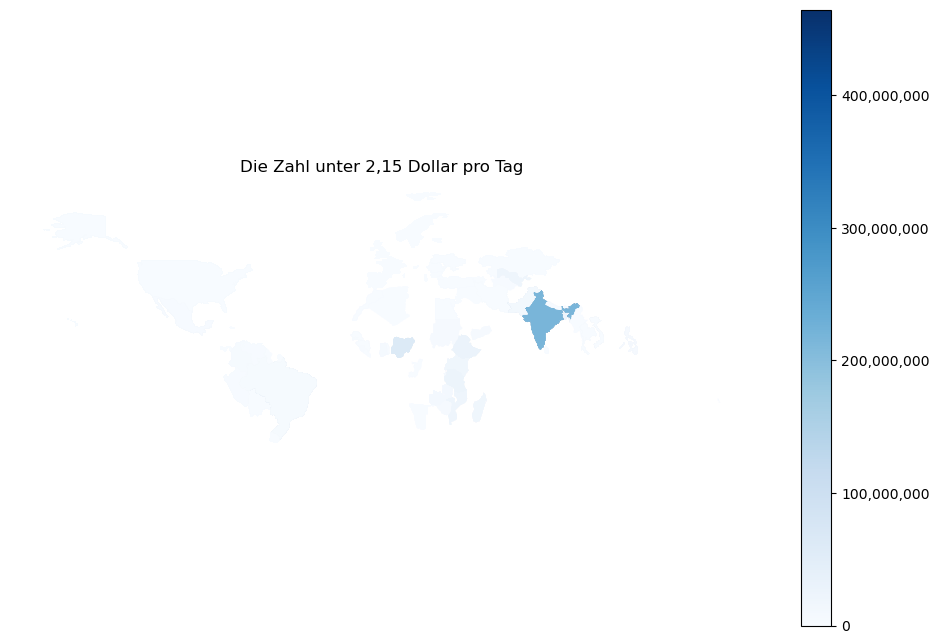

In [109]:
# Plot the data using the 'Müttersterblichkeitsrate' column
ax = merged_geo.plot(
    column="Die Zahl unter 2,15 Dollar pro Tag",  # Column for color coding
    legend=True,
    cmap="Blues",  # Color map
    figsize=(12, 8)
)

# Add a title and adjust layout
ax.set_title("Die Zahl unter 2,15 Dollar pro Tag", fontsize=12)
ax.set_axis_off()  # Removes axis
# Get the colorbar from the plot
colorbar = ax.get_figure().axes[1]  # The second axes is the colorbar

# Custom tick formatting to avoid scientific notation
def format_func(value, tick_number):
    return f"{int(value):,}"  # Format as regular integer with commas

# Apply the formatter to the colorbar ticks
colorbar.set_yticklabels([format_func(tick, 0) for tick in colorbar.get_yticks()])


# Show the plot
plt.show()

### 3.2 Analyse Jahr

In [110]:
print('Anzahl verschiedener Jahre: ', len(merged_df['Jahr'].unique()))

Anzahl verschiedener Jahre:  31


In [111]:
# Anzahl Datenpunkte pro Jahr
merged_df['Jahr'].value_counts().sort_index()

Jahr
1990    13
1991    11
1992    20
1993    13
1994    12
1995    18
1996    19
1997    16
1998    20
1999    19
2000    21
2001    18
2002    30
2003    27
2004    33
2005    35
2006    40
2007    30
2008    32
2009    35
2010    38
2011    38
2012    41
2013    31
2014    34
2015    40
2016    37
2017    34
2018    41
2019    35
2020    30
Name: count, dtype: int64

In [112]:
import seaborn as sns

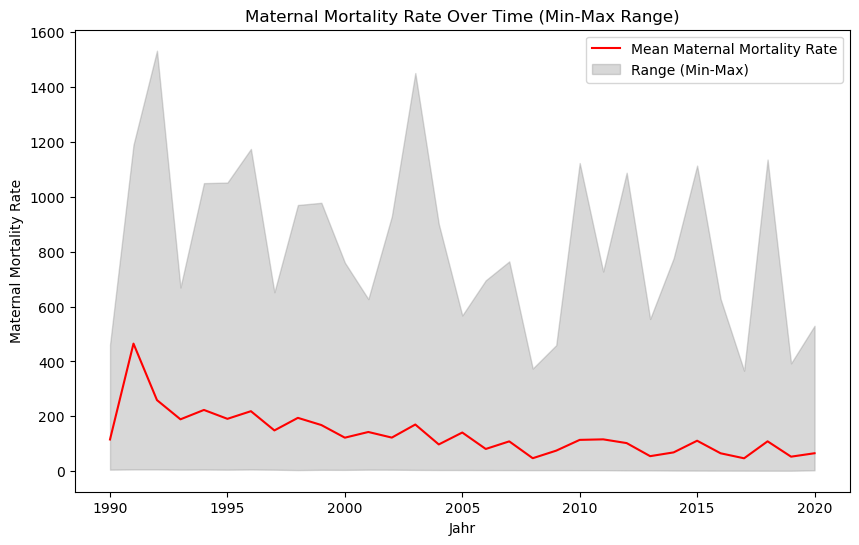

In [113]:
# Creating a range plot (like a candle chart) for the poverty share or maternal mortality
plt.figure(figsize=(10, 6))

# Group data by year and calculate statistics (min, max, and mean for each year)
yearly_stats = merged_df.groupby('Jahr').agg(
    min_value=('Müttersterblichkeitsrate', 'min'),
    max_value=('Müttersterblichkeitsrate', 'max'),
    mean_value=('Müttersterblichkeitsrate', 'mean')
).reset_index()

# Plotting the "candle" chart - Range plot (using min and max values)
sns.lineplot(data=yearly_stats, x="Jahr", y="mean_value", label="Mean Maternal Mortality Rate", color="red")
plt.fill_between(yearly_stats['Jahr'], yearly_stats['min_value'], yearly_stats['max_value'], color='gray', alpha=0.3, label="Range (Min-Max)")

# Adding labels and title
plt.xlabel("Jahr")
plt.ylabel("Maternal Mortality Rate")
plt.title("Maternal Mortality Rate Over Time (Min-Max Range)")
plt.legend()
plt.show()

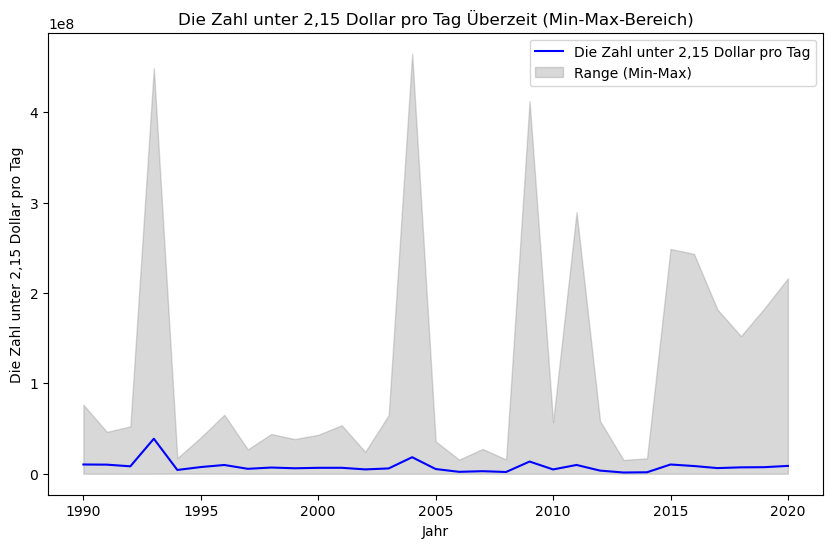

In [114]:
# Creating a range plot (like a candle chart) for the poverty share or maternal mortality
plt.figure(figsize=(10, 6))

# Group data by year and calculate statistics (min, max, and mean for each year)
yearly_stats = merged_df.groupby('Jahr').agg(
    min_value=('Die Zahl unter 2,15 Dollar pro Tag', 'min'),
    max_value=('Die Zahl unter 2,15 Dollar pro Tag', 'max'),
    mean_value=('Die Zahl unter 2,15 Dollar pro Tag', 'mean')
).reset_index()

# Plotting the "candle" chart - Range plot (using min and max values)
sns.lineplot(data=yearly_stats, x="Jahr", y="mean_value", label="Die Zahl unter 2,15 Dollar pro Tag", color="blue")
plt.fill_between(yearly_stats['Jahr'], yearly_stats['min_value'], yearly_stats['max_value'], color='gray', alpha=0.3, label="Range (Min-Max)")

# Adding labels and title
plt.xlabel("Jahr")
plt.ylabel("Die Zahl unter 2,15 Dollar pro Tag")
plt.title("Die Zahl unter 2,15 Dollar pro Tag Überzeit (Min-Max-Bereich)")
plt.legend()
plt.show()

## 4. Analyse 

### Vorgehen

In [115]:
correlation = merged_df["Die Zahl unter 2,15 Dollar pro Tag"].corr(merged_df["Müttersterblichkeitsrate"])
print(f"Correlation coefficient: {correlation}")


Correlation coefficient: 0.2104116158453981


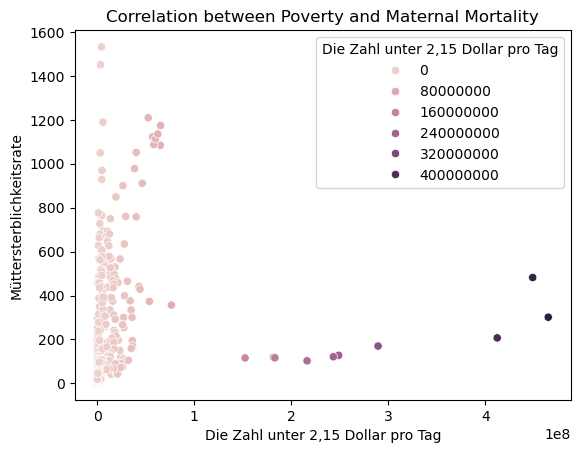

In [116]:
sns.scatterplot(
    data=merged_df,
    x="Die Zahl unter 2,15 Dollar pro Tag",
    y="Müttersterblichkeitsrate",
   hue="Die Zahl unter 2,15 Dollar pro Tag",  # Numeric column for gradient
)
plt.title("Correlation between Poverty and Maternal Mortality")
plt.xlabel("Die Zahl unter 2,15 Dollar pro Tag")
plt.ylabel("Müttersterblichkeitsrate")
plt.show()